#### Projeto
incêndio

In [1]:
# Importação das Bibliotecas
import pandas as pd

In [3]:
# Importação da base de Dados
df = pd.read_csv('./data/amazon.csv', encoding='iso8859-1')
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
# Verificando o tamanho da base 
df.shape

(6454, 5)

In [5]:
# Verificando as informação 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [12]:
df2 = df.iloc[:, 3:5]
df2

,number,date
0,0.0,1998-01-01
1,0.0,1999-01-01
2,0.0,2000-01-01
3,0.0,2001-01-01
4,0.0,2002-01-01
...,...,...
6449,128.0,2012-01-01
6450,85.0,2013-01-01
6451,223.0,2014-01-01
6452,373.0,2015-01-01


In [13]:
# Visualização do tipo de dados dos atributos
print(df2.dtypes)

number    float64
date       object
dtype: object


In [15]:
df2.to_csv('fie.csv')

In [14]:
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
"""
Conversão dos atributos que estão no formato string para formato de data: 
ANO-MÊS
"""
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
base = pd.read_csv(
    './data/fie.csv', parse_dates = ['date'], index_col = 'date',
    date_parser= dataparse
)
base

,Unnamed: 0,number
date,,
1998-01-01,0,0.0
1999-01-01,1,0.0
2000-01-01,2,0.0
2001-01-01,3,0.0
2002-01-01,4,0.0
...,...,...
2012-01-01,6449,128.0
2013-01-01,6450,85.0
2014-01-01,6451,223.0


In [18]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,number
date,
1998-01-01,0.0
1999-01-01,0.0
2000-01-01,0.0
2001-01-01,0.0
2002-01-01,0.0


In [19]:
ts = base['number']
ts

date
1998-01-01      0.0
1999-01-01      0.0
2000-01-01      0.0
2001-01-01      0.0
2002-01-01      0.0
              ...  
2012-01-01    128.0
2013-01-01     85.0
2014-01-01    223.0
2015-01-01    373.0
2016-01-01    119.0
Name: number, Length: 6454, dtype: float64

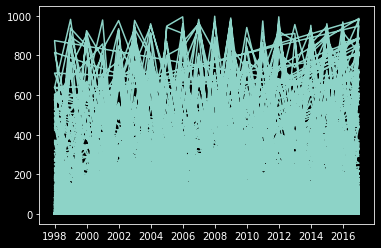

In [20]:
# Visualização da série temporal completa
plt.plot(ts)

date
1998-12-31    20013.971
1999-12-31    26882.821
2000-12-31    27351.251
2001-12-31    29071.612
2002-12-31    37390.600
2003-12-31    42760.674
2004-12-31    38453.163
2005-12-31    35004.965
2006-12-31    33832.161
2007-12-31    33037.413
2008-12-31    29378.964
2009-12-31    39117.178
2010-12-31    37037.449
2011-12-31    34633.545
2012-12-31    40084.860
2013-12-31    35146.118
2014-12-31    39621.183
2015-12-31    41208.292
2016-12-31    42212.229
2017-12-31    36685.624
Freq: A-DEC, Name: number, dtype: float64

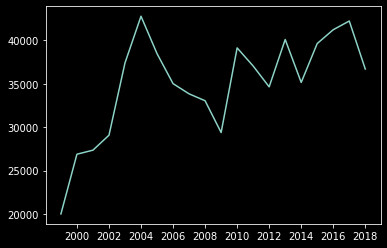

In [21]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano